# What Is Amazon Forecast?
Amazon Forecast is a fully managed service for time-series forecasting. By providing Amazon Forecast
with historical time-series data, you can predict future points in the series. Time-series forecasting is
useful in multiple domains, including retail, financial planning, supply chain, and healthcare. You can
also use Amazon Forecast to forecast operational metrics for inventory management, and workforce and
resource planning and management.

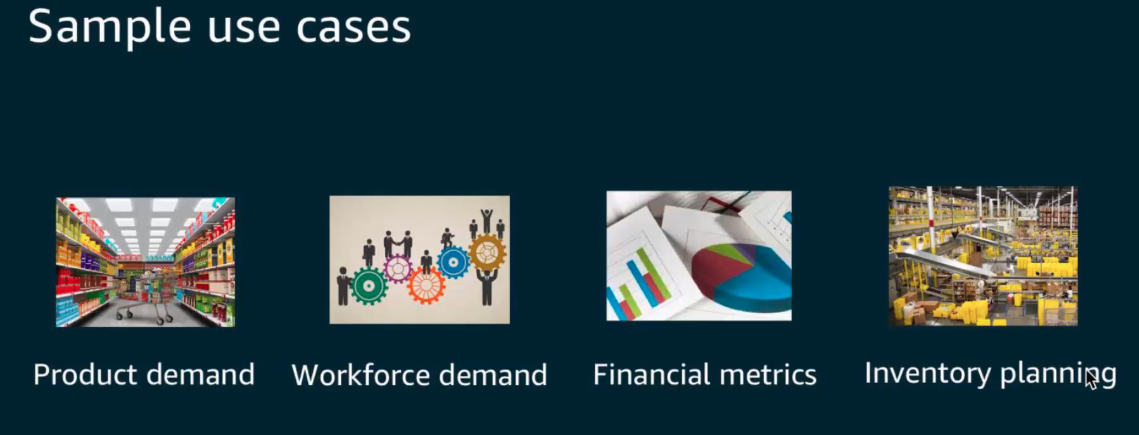

Amazon Forecast greatly simplifies building machine learning models. In addition to providing a set
of predefined algorithms, Forecast provides an AutoML option for model training. AutoML automates
complex machine learning tasks, such as algorithm selection, hyperparameter tuning, iterative modeling,
and model assessment

### Amazon Forecast provides the following additional advantages:
• Accuracy – Amazon Forecast uses deep neural net and traditional statistical methods for forecasting.
When you have many related time series, forecasts made using the Amazon Forecast deep learning
algorithms, such as DeepAR+ (p. 54), tend to be more accurate than forecasts made with traditional
methods, such as exponential smoothing.

• Usability – You can use theAmazon Forecast console to look up and visualize forecasts for any time
series at different granularities. You can also see metrics for the accuracy of your forecasts.

# How Amazon Forecast Works
When creating forecasting projects in Amazon Forecast, you work with the following resources:

• Datasets and Dataset Groups (p. 2) – Datasets are collections of your input data. Dataset groups
are collections of datasets that contain complimentary information. Forecast algorithms use your
dataset groups to train custom forecasting models, called predictors.

• Predictors (p. 11) – Predictors are custom models trained on your data. You can train a predictor
by choosing a prebuilt algorithm,or by choosing the AutoML option to have Amazon Forecast pick the
best algorithm for you.

• Forecasts (p. 12) – You can generate forecasts for your time-series data, query them using the
QueryForecast API, or visualize them in the console.

# Datasets and Dataset Groups

- Datasets contain the data used to train a predictor. You create one or more Amazon Forecast datasets and import your training data into them. 
- A dataset group is a collection of complimentary datasets that detail a set of changing parameters over a series of time. After creating a dataset group, you use it to train a predictor.

- Each dataset group can have up to three datasets, one of each dataset type:
    - TARGET_TIME_SERIES
    - RELATED_TIME_SERIES
    - ITEM_METADATA.

## Datasets

When creating a dataset, you provide information, such as the following:

• The frequency/interval at which you recorded your data. For example, you might aggregate and record
retail item sales every week. 

• The prediction format (the domain) and dataset type (within the domain). A dataset domain specifies
which type of forecast you'd like to perform, while a dataset type helps you organize your training
data into Forecast-friendly categories.

• The dataset schema. A schema maps the column headers of your dataset. For instance, when
monitoring demand, you might have collected hourly data on the sales of an item at multiple stores.
In this case, your schema would define the order, from left to right, in which timestamp, location, and
hourly sales appear in your training data file. Schemas also define each column's data type, such as
string or integer.

 Each column in your Forecast dataset represents either a forecast "dimension" or "feature". 
- Forecast dimensions describe the aspects of your data that do not change over time, such a store or location.
- Forecast features include any parameters in your data that vary across time, such as price or promotion. 

Some dimensions, like timestamp or itemId, are required in TARGET_TIME_SERIES and RELATED_TIME_SERIES datasets.

### Dataset Domains and Dataset Types

## Predefined Dataset Domains and Dataset Types
To train a predictor, you create one or more datasets, add them to a dataset group, and provide the
dataset group for training.

For each dataset that you create, you associate a dataset domain and a dataset type. A dataset domain
defines a forecasting use case.

Amazon Forecast supports the following dataset domains:

• RETAIL Domain – For retail demand forecasting

• INVENTORY_PLANNING Domain  – For supply chain and inventory planning

• EC2 CAPACITY Domain  – For forecasting Amazon Elastic Compute Cloud (Amazon EC2)
capacity

• WORK_FORCE Domain  – For work force planning

• WEB_TRAFFIC Domain  – For estimating future web traffic

• METRICS Domain  – For forecasting metrics, such as revenue and cash flow

• CUSTOM Domain  – For all other types of time-series forecasting

Forecast provides domains for a number of use cases, such as forecasting retail demand or web traffic,...

- Each domain can have one to three dataset types. The dataset types that you create for a domain are based on the type of data that you have and what you want to include in training.
- Each domain requires a TARGET_TIME_SERIES dataset, and optionally supports the RELATED_TIME_SERIES and ITEM_METADATA dataset types.

Within each domain, Forecast users can specify the following types of datasets:

• TARGET_TIME_SERIES dataset (Required) – Use this dataset type when your training data is a time
series and it includes the field that you want to generate a forecast for. This field is called the target
field.

• RELATED_TIME_SERIES dataset (Optional) – Choose this dataset type when your training data is a
time series, but it doesn't include the target field. For instance, if you're forecasting item demand, a
RELATED_TIME_SERIES dataset might have price as a field, but not demand.

• ITEM_METADATA dataset (Optional) – Choose this dataset type when your training data isn't timeseries data, but includes metadata information about the items in the TARGET_TIME_SERIES or
RELATED_TIME)SERIES datasets. For instance, if you're forecasting item demand, an ITEM_METADATA
dataset might color or brand as dimensions. Forecast only considers the data provided by an
ITEM_METADATA dataset type when you use the DeepAR+ (p. 54) algorithm.

### Dataset Schema

Each dataset requires a schema, a user-provided JSON mapping of the fields in your training data. This is
where you list both the required and optional dimensions and features that you want to include in your
dataset.
Some domains have optional dimensions that we recommend including. Optional dimensions are listed
in the descriptions of each domain later in this guide.

Example of a schema:

 "attributes": [
 
     {
         "attributeName": "item_id",
         "attributeType": "string"
     },
 
     {
         "attributeName": "timestamp",
         "attributeType": "timestamp"
     },
     
     {
         "attributeName": "demand",
         "attributeType": "float"
     },
     
     {
         "attributeName": "dimension1",
         "attributeType": "string"
     }
 ]

- When you upload your training data to the dataset that uses this schema, Forecast assumes that the
"item_id" field is column 1 in your data, the "timestamp" field is column 2, the "demand" field is column 3,
and the "dimension1" field is column 4.
- For the RELATED_TIME_SERIES dataset type, all related features must have a float or integer attribute
type. For the ITEM_METADATA dataset type, all features must have a string attribute type.
- Note:

    The attributeName and attributeType attributes are required for every datat point in
the dataset. Forecast reserves a number of names that can't be used as the name of a schema
attribute.

## Dataset Groups
A dataset group is a collection of one to three complimentary datasets, one of each dataset type. You
import datasets to a dataset group, then use the dataset group to train a predictor.

## Importing Data to a Dataset
To import data to your dataset, use the CreateDatasetImportJob (p. 112) operation. Forecast can read
only CSV files, and the input data must be stored in an Amazon Simple Storage Service (Amazon S3)
bucket.

### Resolving Conflicts in Data Collection Frequency
Forecast can import data that isn't aligned with the collection frequency specified in the
CreateDataset operation. 

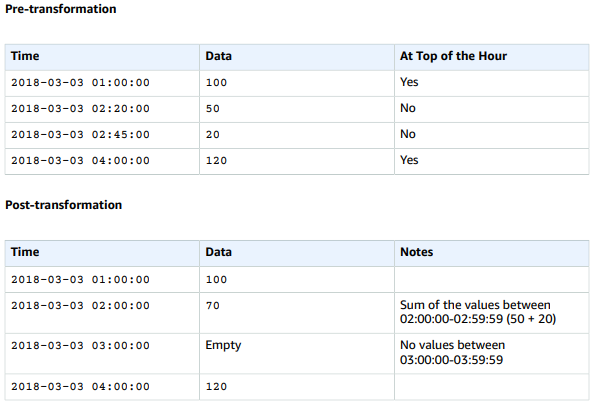

### Time Boundaries
The following table lists the time alignment boundaries Forecast uses when aggregating data:
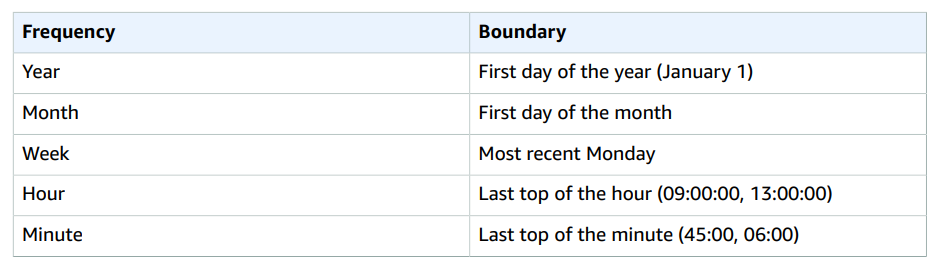

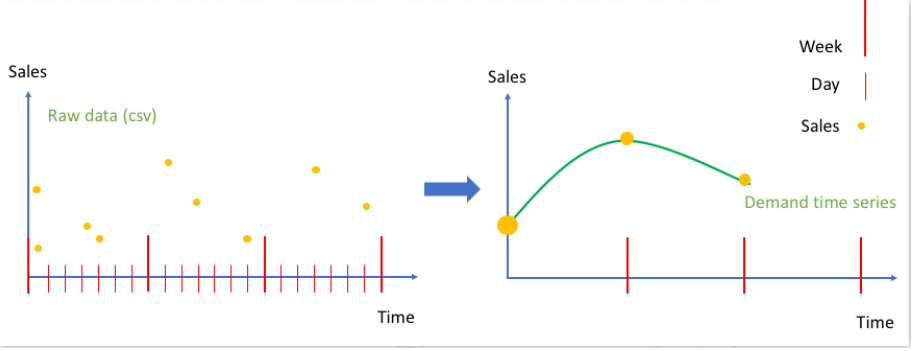

## Using RELATED_TIME_SERIES Datasets
A RELATED_TIME_SERIES dataset includes time-series data that isn't included in a TARGET_TIME_SERIES
dataset and might improve the accuracy of your predictor.

For example, in the demand forecasting domain, a TARGET_TIME_SERIES dataset would contain
timestamp anditem_id dimensions, while a complimentary RELATED_TIME_SERIES dataset also
includes the following supplementary features: item price, promotion, and weather.
    
A RELATED_TIME_SERIES dataset can contain up to 10 forecast dimensions (the same ones in your
TARGET_TIME_SERIES dataset) and up to 13 related time-series features.

You can use a RELATED_TIME_SERIES dataset only when training a predictor with the DeepAR+, NPTS, and Prophet alorithms.

### RELATED_TIME_SERIES Dataset Validation
A RELATED_TIME_SERIES dataset has the following restrictions:

• It can't include the target value from the TARGET_TIME_SERIES.

• It must include item_id and timestamp dimensions, and at least one related feature (such as store
or location).

• RELATED_TIME_SERIES feature data must be of the int or float datatypes.

• Data frequency for a RELATED_TIME_SERIES dataset must match the TARGET_TIME_SERIES data
frequency.

• The data for each item in the RELATED_TIME_SERIES dataset must start on or before the beginning
timestamp of the corresponding item_id in the TARGET_TIME_SERIES dataset.

• The last timestamp for every item in the RELATED_TIME_SERIES dataset must be on or after the last
timestamp in the TARGET_TIME_SERIES plus the user-designated forecast window (called the forecast
horizon).

• The Forecast dimensions provided in the RELATED_TIME_SERIES dataset must be either equal to or a
subset of the dimensions designated in the TARGET_TIME_SERIES dataset.

Important: 
Forecast doesn't support aggregations or filling missing values for RELATED_TIME_SERIES
datasets as it does for TARGET_TIME_SERIES datasets.

## Dataset Import Guidelines for Forecast
Consult to the following guidelines if Amazon Forecast fails to import your dataset.

Timestamp Format
- For Year (Y), Month (M), Week (W), and Day (D) collection frequencies, Forecast supports the yyyyMM-dd timestamp format (for example, 2019-08-21) and, optionally, the HH:mm:ss format (for
example, 2019-08-21 15:00:00).
- For Hour (H) and Minute (M) frequencies, Forecast supports only the yyyy-MM-dd HH:mm:ss format
(for example 2019-08-21 15:00:00).

Guideline: Change the timestamp format for the collection frequency of your dataset to the
supported format.

Amazon S3 File or Bucket
- When you import a dataset, you can specify either the path to the CSV file in your Amazon Simple
Storage Service (Amazon S3) bucket that contains your data or the name of the S3 bucket that
contains your data If you specify a CSV file, Forecast imports just that file. If you specify an S3
bucket, Forecast imports all of the CSV files in the bucket up to 10,000 files. If you import multiple
files by specifying a bucket name, all CSV files must conform to the specified schema.

Attribute Order
- The order of attributes specified in the schema definition must match the column order in the
CSV file that you are importing. For example, if you defined timestamp as the first attribute, then
timestamp must also be the first column in the input CSV file.

Guideline: Verify that the columns in the CSV file are in the same order as the schema attributes that
you created.

Dataset Header
- The dataset header is optional. We recommend omitting the header in your input CSV file.

Guideline: Delete the dataset header and try the import again.

Dataset Status
- Before you can import training data with the the section called “CreateDatasetImportJob” (p. 112)
operation, the Statusof the dataset must be ACTIVE.

Guideline: Use the DescribeDataset (p. 139) operation to get the dataset's status. If the creation or
update of the dataset failed, check the formatting of your dataset file and attempt to create it again.

File Format and Delimiter
- Forecast supports only the comma-separated values (CSV) file format. You can't separate values
using tabs, spaces, colons, or any other characters.

Guideline: Convert your dataset to CSV format (using only commas as your delimiter) and try
importing the file again.

File Name

- File names must contain at least one alphabetic character. Files with names that are only numeric
can't be imported.

Guideline: Rename your CSV file to include at least one alphabetic character and try importing the
file again.

## Predictors
A predictor is an Amazon Forecast trained model used for making forecasts based on time-series data.
During training, Amazon Forecast generates accuracy metrics that you use to evaluate the predictor and
decide whether to use the predictor to generate a forecast.

### Creating Predictors
- Amazon Forecast trains forecasting models called predictors. To create a predictor, you use the
CreatePredictor (p. 121) operation.
- To create a predictor, you provide the following:

    • A dataset group – Provides data for training the predictor. 

    • A featurization configuration – Specifies the forecast frequency and provides information for
    transforming the data before model training. Data is transformed to make it more compatible with the
    training algorithm.

    • A forecast horizon – The number of time-steps to make. The forecast horizon is also called the
    prediction length.

    • Evaluation parameters – How to split a dataset into training and test datasets.

    • One of the following:

        • An algorithm – The algorithm is used to train a model and specifies default values for hyperparameter optimization (only DeepAR+), evaluation parameters, and training parameters. By specifying an algorithm, you also can provide overrides for these parameter values.

        • Perform AutoML – Amazon Forecast provides a set of predefined algorithms. If you don't know which algorithm to choose, use the PerformAutoML option. 

### Predictor Evaluation

##### Evaluation Parameters:

- The evaluation parameters define how to split a dataset into training and test datasets for backtest window evaluations, as well as the number of backtest iterations to perform. These parameters have default values that can be overridden in the CreatePredictor request.
- The evaluation parameters consist of the NumberOfBacktestWindows and the BackTestWindowOffset parameters.
    - NumberOfBacktestWindows specifies the number of times to split the input data. The range is 1 through 5.
    - BackTestWindowOffset defines the point from the end of the dataset where the data is split for model training and testing (evaluation). The value is specified as the number of data points. BackTestWindowOffset must be greater than or equal to the forecast horizon and less than half of the TARGET_TIME_SERIES dataset length. 
    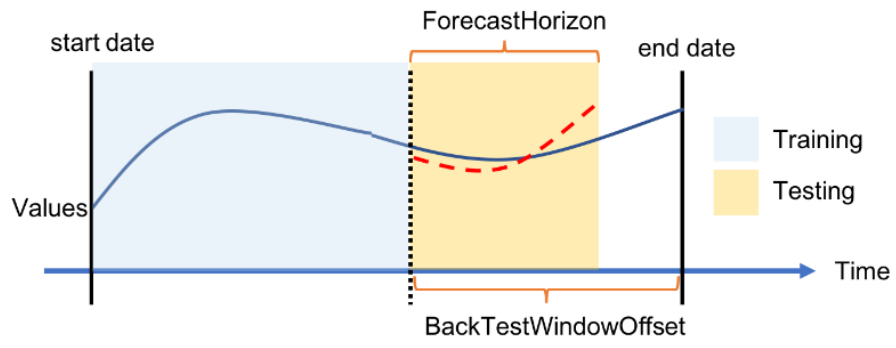

## Forecasts
After creating an Amazon Forecast predictor, you call the CreateForecast operation to create a
forecast.

# Choosing an Amazon Forecast Algorithm

Every Amazon Forecast predictor uses an algorithm to train a model, then uses the model to make a forecast using an input dataset group. To help you get started, Amazon Forecast provides the following predefined algorithms:

    • Autoregressive Integrated Moving Average (ARIMA) Algorithm (p. 53)

    • DeepAR+ Algorithm (p. 54)*
    
    • Exponential Smoothing (ETS) Algorithm (p. 61)
    
    • Non-Parametric Time Series (NPTS) Algorithm (p. 61)
    
    • Prophet Algorithm (p. 65)
    
    • Supports hyperparameter optimization (HPO)

## Autoregressive Integrated Moving Average (ARIMA) Algorithm
- Autoregressive Integrated Moving Average (ARIMA) is a commonly-used local statistical algorithm for
time-series forecasting. ARIMA captures standard temporal structures (patterned organizations of time)
in the input dataset. The Amazon Forecast ARIMA algorithm calls the Arima function in the Package
'forecast' of the Comprehensive R Archive Network (CRAN).